In [1]:
from __future__ import division, print_function

Three parts:

1) Compute permutations of an input string.

2) Compute permutations of an input string using good space complexity.

3) Compute permutations of an input string without making duplicates and with good space complexity.

In [2]:
def permutations(string):
    '''Finds permuations recursively using space complexity ~ O(N! N^2 ) yikes...
    
    N! from the number of items in the final list you keep.
    N^2 from a given branch of the recursion which will each have partial lists like:
    N + N-1 + N-2 ... 1 = ~ O(N^2)
    
    '''
    chars = list(string)
    
    if not chars:
        return ['']
    
    ls = []
    for x in chars:
        char_cp = [y for y in chars]
        #print(char_cp) # shows how much memory you are using
        char_cp.remove(x)
        sub_perms = permutations(char_cp)
        
        for sub in sub_perms:
            ls.append(x + sub)
        #print(x, ls)
    return ls

permutations('abc'), permutations('aba')

(['abc', 'acb', 'bac', 'bca', 'cab', 'cba'],
 ['aba', 'aab', 'baa', 'baa', 'aba', 'aab'])

In [5]:
def permutations_generator(string):
    '''Generates permutations using N^2 space.
    
    Follows from same logic as above except no storage of intermediate results.
    Therefore at max recursion depth, the first permutation is just returned (yield).
    
    '''
    chars = list(string)
    
    if not chars:
        yield ''
    else:
        for x in chars:
            char_cp = [y for y in chars]
            char_cp.remove(x)
            
            sub_string = ''.join(char_cp)
            sub_perms = permutations_generator(sub_string)
            for sub in sub_perms:
                yield x + sub
[x for x in permutations_generator('abc')], [x for x in permutations_generator('aba')]

(['abc', 'acb', 'bac', 'bca', 'cab', 'cba'],
 ['aba', 'aab', 'baa', 'baa', 'aba', 'aab'])

In [6]:
def perm_gen_nodup(string):
    '''Generates permutations using O(N^2) space with no duplicates.
    
    
    '''
    chars = list(string)
    
    if not chars:
        yield ''
    else:
        chars_exp = set() # this is only created along the current branch in the recursion
                          # therefore N + N-1 + N-2 ... 1 = N^2
    
        for x in chars:
            if x in chars_exp:
                continue
            else:
                chars_exp.add(x)
            char_cp = [y for y in chars]
            char_cp.remove(x)
            sub_string = ''.join(char_cp)
            sub_perms = perm_gen_nodup(sub_string)
            for sub in sub_perms:
                yield x + sub
[x for x in perm_gen_nodup('abc')], [x for x in perm_gen_nodup('aba')]

(['abc', 'acb', 'bac', 'bca', 'cab', 'cba'], ['aba', 'aab', 'baa'])

In [7]:
def nodupe_permutations(string):
    '''
    
    Order the chars in the string lexographically. This allows local comparison
    before following a character which will be on a path already traversed.
    
    e.g.
    'zaabc'
    When exploring the 2nd 'a' along the path
    'za' -> 'abc', one can recognize that you have already explored
    'za' + call('abc') so you can skip this recursion.
    
    '''
    lex = ''.join(sorted(string)) # N log N time complexity
    return permutation_generator_nodupe(lex)

def permutation_generator_nodupe(string):
    '''Generates permutations using O(N) space with no duplicates.'''
    if not string:
        yield ''
    else:
        chars = list(string)
        prev_char = None
        for c in chars:
            if c == prev_char:
                continue
            chars_ls = [y for y in chars]
            chars_ls.remove(c)
            sub_string = ''.join(chars_ls)
            for sub in permutation_generator_nodupe(sub_string):
                yield c + sub
            prev_char = c


In [8]:
for x in nodupe_permutations('aabc'):
    print(x)

aabc
aacb
abac
abca
acab
acba
baac
baca
bcaa
caab
caba
cbaa


In [21]:
import time
stats = []
chars = list('abcdefghijklmnopqrs')
for ix in range(10):
    string = ''.join(chars[:ix])
    print(string)
    
    count = 0
    start = time.time()
    for x in nodupe_permutations(string):
        count += 1
    end = time.time()
    
    stats.append((len(string), count, end-start))


a
ab
abc
abcd
abcde
abcdef
abcdefg
abcdefgh
abcdefghi


In [22]:
stats

[(0, 1, 5.0067901611328125e-06),
 (1, 1, 7.867813110351562e-06),
 (2, 2, 1.1920928955078125e-05),
 (3, 6, 2.9087066650390625e-05),
 (4, 24, 0.00012087821960449219),
 (5, 120, 0.0006678104400634766),
 (6, 720, 0.0035991668701171875),
 (7, 5040, 0.02054905891418457),
 (8, 40320, 0.16103601455688477),
 (9, 362880, 1.4618029594421387)]

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

In [24]:
import numpy as np
from scipy.misc import factorial
factorial(6)
factN = [factorial(n) for n in range(12)]

In [25]:
x1, x2, y = zip(*stats)

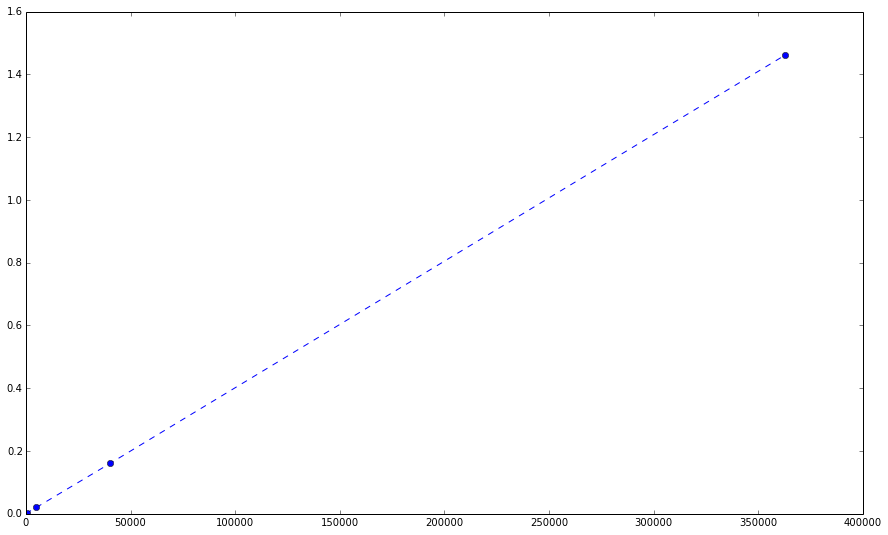

In [26]:
fig, ax = plt.subplots(figsize=(15,9))
ax.plot(x2, y, 'o--')

plt.show()

In [9]:
range(5)

[0, 1, 2, 3, 4]

In [12]:
y = xrange(5)
for x in y:
    print(x)

0
1
2
3
4
